In [5]:
# Polynomial Regression 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import PolynomialFeatures, StandardScaler 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error 


In [10]:
dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", 
           "acceleration", "model_year", "origin", "car_name"]  # added car_name for correct parsing
df = pd.read_csv(dataset_url, delim_whitespace=True, names=columns, na_values='?')

C:\Users\akshi\AppData\Local\Temp\ipykernel_21168\3368256938.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(dataset_url, delim_whitespace=True, names=columns, na_values='?')


Mean Squared Error: 16.38


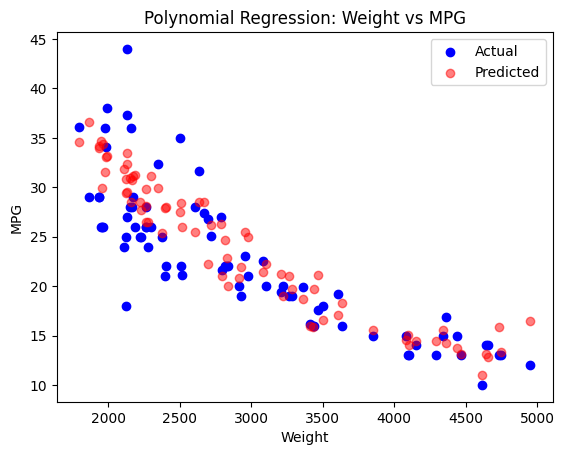

In [12]:
df.dropna(inplace=True)
df['horsepower'] = df['horsepower'].astype(float)


X = df[['displacement', 'horsepower', 'weight', 'acceleration']]
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)


model = LinearRegression()
model.fit(X_train_poly, y_train)


y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

plt.scatter(X_test['weight'], y_test, color='blue', label='Actual')
plt.scatter(X_test['weight'], y_pred, color='red', alpha=0.5, label='Predicted')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('Polynomial Regression: Weight vs MPG')
plt.legend()
plt.show()
